In [41]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

In [42]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

le = 20
p_all = np.load('Input_RF.npy')
d = np.load('Target_RF.npy')
d = d*le

regr = RandomForestRegressor(max_depth=1000,max_features=8,min_samples_leaf=1,n_estimators=100,oob_score=False,random_state=0,verbose=1,criterion='mse',n_jobs=-1)
ix = int(len(p_all)*0.9)
tic()
regr.fit(p_all[0:ix],d[0:ix]) 
toc()
# Scaling
d  = d /le

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   48.3s


Elapsed time: 160.959506 seconds.



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


In [50]:
# test
tic()
outtest = regr.predict(p_all[ix:])
toc()
# Scaling
outtest = outtest/le

ddx = p_all[:,0][ix:]
ddx1 = p_all[:,5][ix:]
dd = ddx   -  d[:,0][ix:]
dd1 = ddx1 - d[:,1][ix:]


distall=[]
outtest1 = np.zeros_like(outtest)
outtest1[:,0] =   ddx - outtest[:,0]
outtest1[:,1] =   ddx1  - outtest[:,1]

errlattest  = np.mean(np.abs( np.abs(outtest1[:,0]) - np.abs(dd) ))
errlongtest = np.mean(np.abs( np.abs(outtest1[:,1]) - np.abs(dd1) ))
# Lat and Lon error in degree
print(errlattest, errlongtest)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s


Elapsed time: 1.917317 seconds.

0.014518537014 0.0228072716339


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.8s finished


In [51]:
import obspy
c=[]



distall=[]
outtest1 = np.zeros_like(outtest)
outtest1[:,0] =   ddx - outtest[:,0]
outtest1[:,1] =   ddx1  - outtest[:,1]
for i in range(0,len(dd)):
    #mae = np.mean(np.abs(outtest[i]-dd[i]))
    #mae1 = np.mean(np.abs(outtest1[i]-dd1[i]))
    #if (mae<=0.1) and (mae1<=0.1):
    dis = obspy.geodetics.base.gps2dist_azimuth(dd[i],dd1[i],outtest1[i,0],outtest1[i,1])
    distall.append(dis[0]/1000)
    if np.array(dis)[0]/1000<=0.1*112:
        c.append(i)
distall = np.array(distall)
c = np.array(c)
# print distance error in km, Number of events having error within 0.1 degree and its percentage.
print(len(c), len(dd), len(c)/len(dd), np.mean(np.array(distall)))

159793 169279 0.9439623343710679 2.87891661329


2.8789166132943049

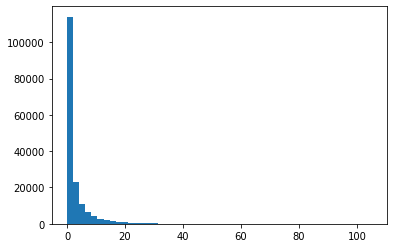

In [52]:
import matplotlib.pyplot as plt
plt.hist(distall,bins=50)
np.mean(distall)

